LBC AmBe timing pulses

In [ ]:
import numpy as np
import scipy
from scipy import integrate
from scipy.stats import skew
from scipy.signal import savgol_filter
from scipy.fft import rfft, rfftfreq
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
 with open("/content/drive/MyDrive/pulse/C1--dummy--00000.trc.txt","r") as f:

  lines=f.readlines()


  amp=[]
  time=[]
  for x in lines[5:]:
      amp.append(x.split(' ')[1])
      time.append(x.split(' ')[0])
  f.close()

In [ ]:
temp=[]
a=[]
t=[]
for x in time:
  t.append(float(x))
for x in amp:
  temp.append(float(x))
for x in temp:
  a.append(x)

norm_amp=[(x-min(a))/(max(a)-min(a)) for x in a]

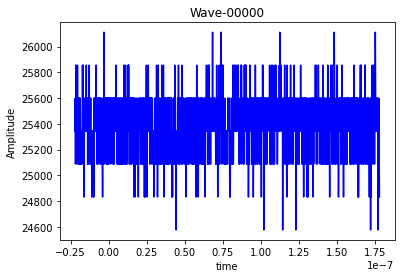

In [ ]:
import matplotlib.pyplot as plt

plt.plot(t, a, color= "blue")

# x-axis label
plt.xlabel('time')
# frequency label
plt.ylabel('Amplitude')
# plot title
plt.title('Wave-00000')


# function to show the plot
plt.show()

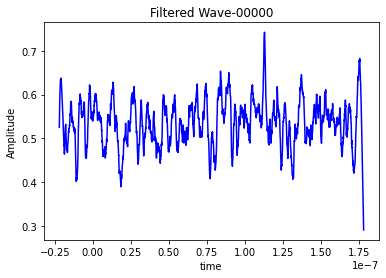

In [ ]:
from scipy.signal import savgol_filter

smoothed_3dg = savgol_filter(norm_amp, window_length = 41, polyorder = 3)

plt.plot(t, smoothed_3dg, color= "blue")

# x-axis label
plt.xlabel('time')
# frequency label
plt.ylabel('Amplitude')
# plot title
plt.title('Filtered Wave-00000')


# function to show the plot
plt.show()

In [ ]:
skew(smoothed_3dg)

1.438969771709435

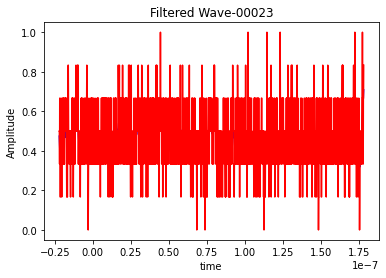

In [ ]:
with open("/content/drive/MyDrive/pulse/C1--dummy--00000.trc.txt","r") as f:

  lines=f.readlines()


  amp=[]
  time=[]
  for x in lines[5:]:
      amp.append(x.split(' ')[1])
      time.append(x.split(' ')[0])
  f.close()
temp=[]
a=[]
t=[]
for x in time:
  t.append(float(x))
for x in amp:
  temp.append(float(x))
for x in temp:
  a.append(-x+max(temp))

norm_amp=[(x-min(a))/(max(a)-min(a)) for x in a]

smoothed_3dg = savgol_filter(norm_amp, window_length = 41, polyorder = 3)

plt.plot(t, smoothed_3dg, color= "blue")

# x-axis label
plt.xlabel('time')
# frequency label
plt.ylabel('Amplitude')

plt.title('Filtered Wave-00023')

# function to show the plot
plt.show()


In [ ]:
scipy.integrate.simps(norm_amp,t)

4.765001959696299e-08

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
skew(smoothed_3dg)

-0.17823551321389744

In [ ]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

Decay time

In [ ]:

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

max_amp=max(smoothed_3dg)
min_amp=min(smoothed_3dg)
th_span=max_amp-min_amp
th_span_36=0.36*th_span
max_idx=list(smoothed_3dg).index(max_amp)
span_36= find_nearest(smoothed_3dg,th_span_36)

decay_time= t[list(smoothed_3dg).index(span_36)] - t[max_idx]

decay_time

3.43e-08

Spectral Density Calculation

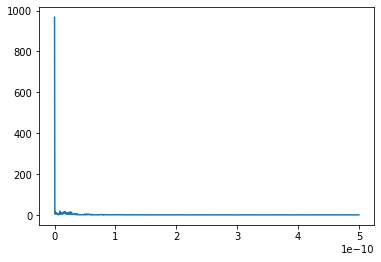

In [ ]:
from scipy.fft import rfft, rfftfreq

SAMPLE_RATE= 10**(-9)
N=len(t)
yf = rfft(smoothed_3dg)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

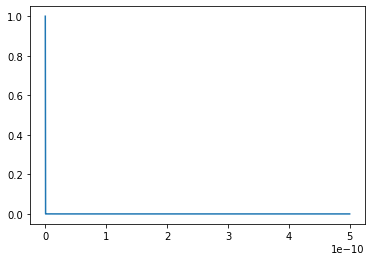

In [ ]:
yf2=[i*i for i in np.abs(yf)]
norm_yf2=[i/max(yf2) for i in yf2]
plt.plot(xf, norm_yf2)
plt.show()


In [ ]:
from scipy.fft import rfft, rfftfreq

SAMPLE_RATE= 10**(-9)
N=len(t)
yf = rfft(smoothed_3dg)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

yf2=[i*i for i in np.abs(yf)]
norm_yf2=[i/max(yf2) for i in yf2]

scipy.integrate.simps(norm_yf2,xf)/(2*np.pi)

9.116026427672394e-14

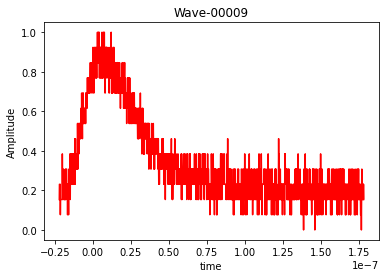

In [ ]:
with open("/content/drive/MyDrive/pulse/C1--dummy--00009.trc.txt","r") as f:

  lines=f.readlines()


  amp=[]
  time=[]
  for x in lines[5:]:
      amp.append(x.split(' ')[1])
      time.append(x.split(' ')[0])
  f.close()

a=[]
t=[]
for x in time:
  t.append(float(x))
for x in amp:
  a.append(-float(x)+21000)

norm_amp=[(x-min(a))/(max(a)-min(a)) for x in a]

plt.plot(t, norm_amp, color= "red")

# x-axis label
plt.xlabel('time')
# frequency label
plt.ylabel('Amplitude')

# plot title
plt.title('Wave-00009')


# function to show the plot
plt.show()

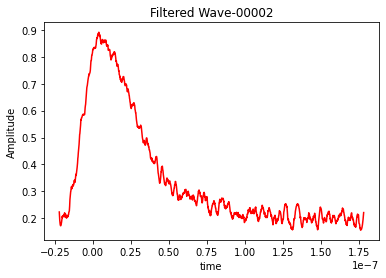

In [ ]:
smoothed_3dg = savgol_filter(norm_amp, window_length = 41, polyorder = 3)

plt.plot(t, smoothed_3dg, color= "red")

# x-axis label
plt.xlabel('time')
# frequency label
plt.ylabel('Amplitude')
# plot title
plt.title('Filtered Wave-00002')


# function to show the plot
plt.show()

In [ ]:
max_amp=max(smoothed_3dg)
min_amp=min(smoothed_3dg)
th_span=max_amp-min_amp
th_span_36=0.36*th_span
max_idx=list(smoothed_3dg).index(max_amp)
span_36= find_nearest(smoothed_3dg,th_span_36)

decay_time= t[list(smoothed_3dg).index(span_36)] - t[max_idx]
decay_time

8.0399997e-08

In [ ]:
scipy.integrate.simps(norm_amp,t)

6.961677241057708e-08

In [ ]:
SAMPLE_RATE= 10**(-9)
N=len(t)
yf = rfft(smoothed_3dg)
xf = rfftfreq(N, 1 / SAMPLE_RATE)
yf2=[i*i for i in np.abs(yf)]
norm_yf2=[i/max(yf2) for i in yf2]
scipy.integrate.simps(norm_yf2,xf)/(2*np.pi)


1.0480068479824692e-13

In [ ]:
import os
from os import listdir
from os.path import isfile, join

mypath="/content/drive/MyDrive/50k_pulses"
files = []
for path in listdir(mypath):
    full_path = join(mypath, path)
    if isfile(full_path):
      files.append(full_path)


In [ ]:
Total_Area=[]
Tail_Area=[]
Decay_T=[]
ESD=[]
Amplitude=[]
for fl in files:
  with open(fl,"r") as f:

    lines=f.readlines()


    amp=[]
    time=[]
    for x in lines[5:]:
        amp.append(x.split(' ')[1])
        time.append(x.split(' ')[0])
    f.close()


  inv_a=[]
  a=[]
  t=[]
  for x in time:
    t.append(float(x))
  for x in amp:
    a.append(float(x))
  for x in amp:
    inv_a.append(-float(x)+max(a))


  norm_amp=[(x-min(a))/(max(a)-min(a)) for x in a]
  norm_amp_inv = [(x-min(a))/(max(a)-min(a)) for x in inv_a]

  smoothed_3dg = savgol_filter(norm_amp, window_length = 41, polyorder = 3)
  smoothed_3dg_inv = savgol_filter(norm_amp_inv, window_length = 41, polyorder = 3)

  max_amp=max(smoothed_3dg_inv)
  min_amp=min(smoothed_3dg_inv)
  th_span=max_amp-min_amp
  th_span_25=0.25*th_span
  max_idx=list(smoothed_3dg_inv).index(max_amp)
  span_25= find_nearest(smoothed_3dg_inv,th_span_25)
  decay_time= np.abs(t[list(smoothed_3dg_inv).index(span_25)] - t[max_idx])

  Decay_T.append(decay_time)
  Amplitude.append(max_amp-min_amp)

  SAMPLE_RATE= 10**(-9)
  N=len(t)
  yf = rfft(smoothed_3dg)
  xf = rfftfreq(N, 1 / SAMPLE_RATE)
  yf2=[i*i for i in np.abs(yf)]
  norm_yf2=[i/max(yf2) for i in yf2]
  ESD.append(scipy.integrate.simps(norm_yf2,xf)/(2*np.pi))

  Total_Area.append(scipy.integrate.simps(smoothed_3dg,t))

  tail_amp= smoothed_3dg[int(3*len(norm_amp)/4):len(norm_amp)]
  tail_time= t[int(3*len(norm_amp)/4):len(norm_amp)]

  Tail_Area.append(scipy.integrate.simps(tail_amp,tail_time))




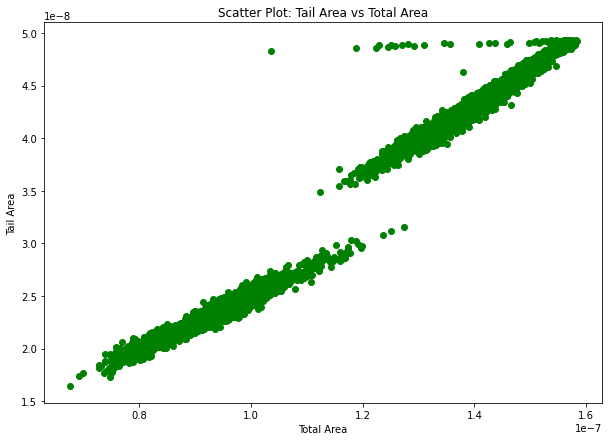

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))

plt.scatter(Total_Area,Tail_Area, color='green')

plt.xlabel('Total Area')

plt.ylabel('Tail Area')

plt.title('Scatter Plot: Tail Area vs Total Area')


# function to show the plot
plt.show()

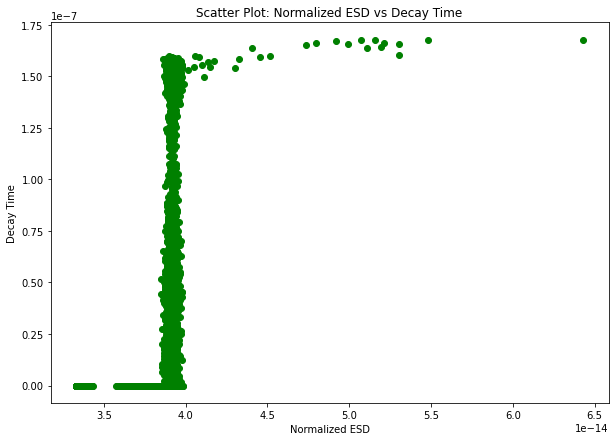

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))

plt.scatter(ESD,Decay_T, color='green')

plt.ylabel('Decay Time')

plt.xlabel('Normalized ESD')

plt.title('Scatter Plot: Normalized ESD vs Decay Time')


# function to show the plot
plt.show()

In [ ]:
import pandas as pd
data = {'Total Area':Total_Area, 'Tail Area':Tail_Area}
df= pd.DataFrame(data)
df.to_excel("/content/drive/MyDrive/TotalTailArea.xlsx")

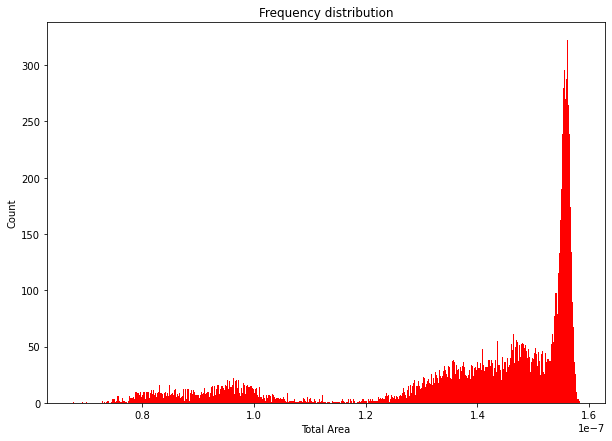

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(Total_Area, bins = 500, color='red')

plt.xlabel('Total Area')

plt.ylabel('Count')

plt.title('Frequency distribution')

# Show plot
plt.show()

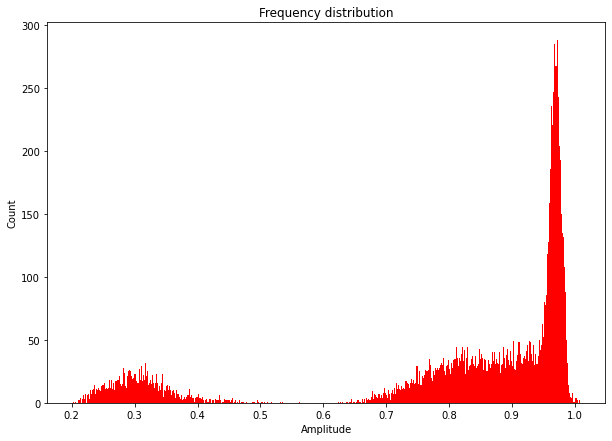

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(Amplitude, bins = 500, color='red')

plt.xlabel('Amplitude')

plt.ylabel('Count')

plt.title('Frequency distribution')

plt.show()

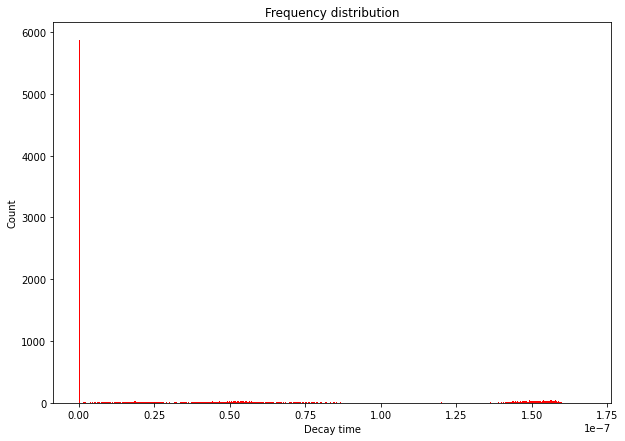

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(Decay_T, bins = 500, color='red')

plt.xlabel('Decay time')

plt.ylabel('Count')

plt.title('Frequency distribution')

plt.show()

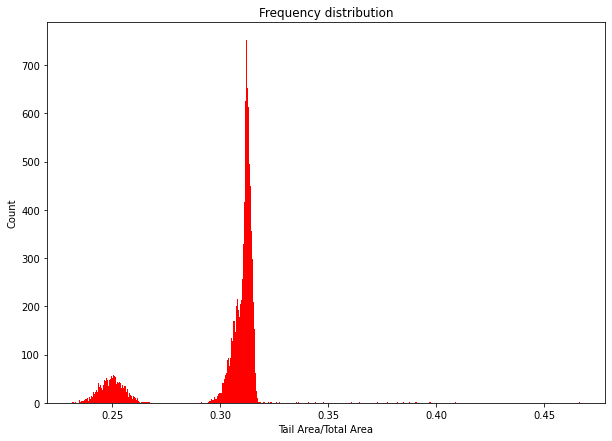

In [ ]:
Total_Tail=[]
for i in range(len(Total_Area)):
  Total_Tail.append(Tail_Area[i]/Total_Area[i])

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(Total_Tail, bins = 500, color='red')

plt.xlabel('Tail Area/Total Area')

plt.ylabel('Count')

plt.title('Frequency distribution')

# Show plot
plt.show()

In [ ]:
mypath="/content/drive/MyDrive/pulse"
files = []
for path in listdir(mypath):
    full_path = join(mypath, path)
    if isfile(full_path):
      files.append(full_path)

Pulse_height=[]

for fp in files:
  with open(fp,"r") as f:

    lines=f.readlines()
    for x in lines[5:]:
      amp=[]
      amp.append(x.split(' ')[1])
    Pulse_height.append(max(amp))
    f.close()

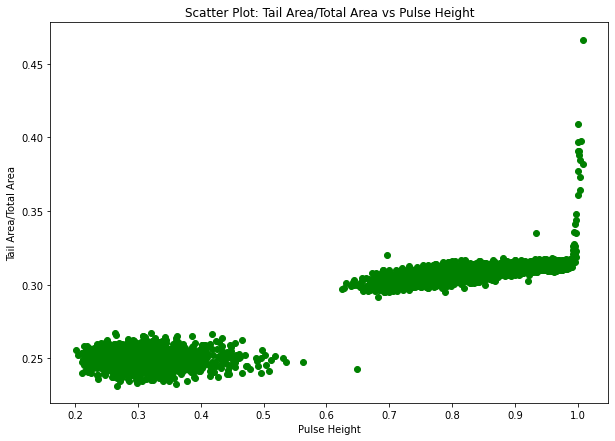

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))

plt.scatter(Amplitude, Total_Tail, color='green')

plt.xlabel('Pulse Height')

plt.ylabel('Tail Area/Total Area')

plt.title('Scatter Plot: Tail Area/Total Area vs Pulse Height')


# function to show the plot
plt.show()